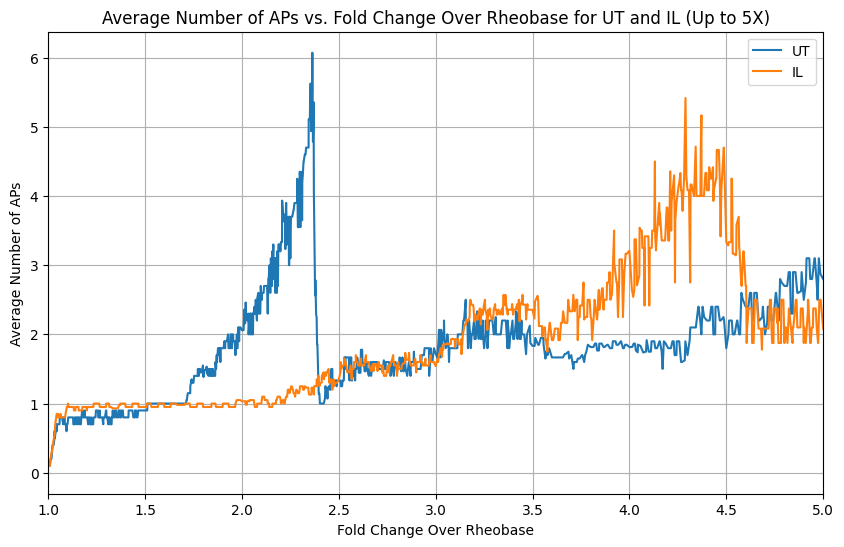

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a DataFrame
file_path = 'HS22_IL_APs.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Identify the first non-zero value (rheobase) for each column
def calculate_rheobase(column):
    non_zero_values = column[column != 0]
    if not non_zero_values.empty:
        return non_zero_values.index[0], non_zero_values.iloc[0]
    return None, None

rheobases = {}
for col in df.columns[1:]:
    index, value = calculate_rheobase(df[col])
    if index is not None:
        rheobases[col] = (index, value)

# Normalize the values in each column to the rheobase value
def normalize_to_rheobase(column, rheobase_value):
    return column / rheobase_value

# Collect normalized data for UT and IL groups
ut_data = []
il_data = []

for col in df.columns[1:]:
    if col in rheobases:
        rheobase_index, rheobase_value = rheobases[col]
        normalized_values = normalize_to_rheobase(df[col], rheobase_value)
        for i, value in enumerate(normalized_values):
            fold_change = i / rheobase_index
            if fold_change <= 5:
                if 'UT' in col:
                    ut_data.append((fold_change, value))
                elif 'IL' in col:
                    il_data.append((fold_change, value))

# Convert lists to DataFrame for easier averaging
ut_df = pd.DataFrame(ut_data, columns=['Fold Change', 'AP Count'])
il_df = pd.DataFrame(il_data, columns=['Fold Change', 'AP Count'])

# Calculate the average number of APs for each fold change
ut_avg = ut_df.groupby('Fold Change')['AP Count'].mean()
il_avg = il_df.groupby('Fold Change')['AP Count'].mean()

# Define a moving average function
def moving_average(series, window_size):
    return series.rolling(window=window_size, min_periods=1).mean()

# Smooth the data using moving average
window_size = 10  # You can adjust the window size for more or less smoothing
ut_avg_smooth = moving_average(ut_avg, window_size)
il_avg_smooth = moving_average(il_avg, window_size)

# Plot the graph of average number of APs against fold change over rheobase for each group
plt.figure(figsize=(10, 6))
plt.plot(ut_avg_smooth.index, ut_avg_smooth.values, label='UT')
plt.plot(il_avg_smooth.index, il_avg_smooth.values, label='IL')
plt.xlabel('Fold Change Over Rheobase')
plt.ylabel('Average Number of APs')
plt.title('Average Number of APs vs. Fold Change Over Rheobase for UT and IL (Up to 5X)')
plt.xlim(1, 5)
plt.legend()
plt.grid(True)
plt.show()

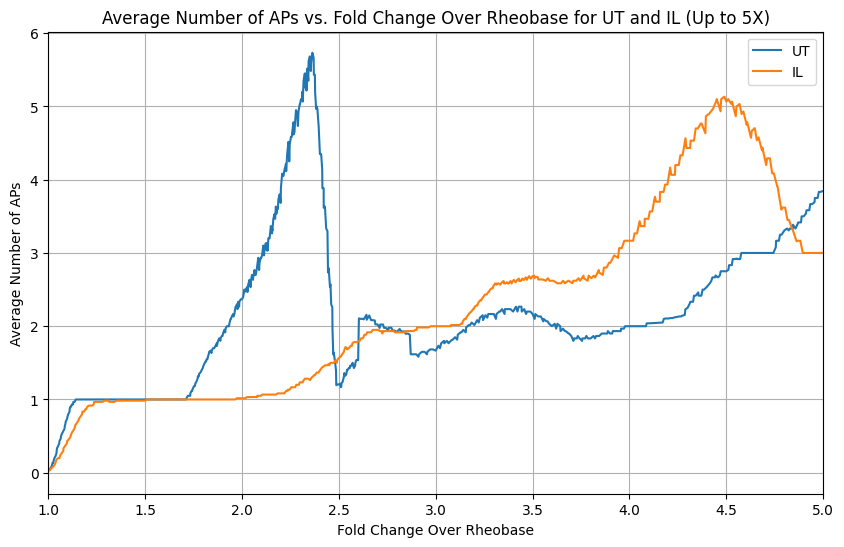

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a DataFrame
file_path = 'HS22_IL_APs_multi.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Identify the first non-zero value (rheobase) for each column
def calculate_rheobase(column):
    non_zero_values = column[column != 0]
    if not non_zero_values.empty:
        return non_zero_values.index[0], non_zero_values.iloc[0]
    return None, None

rheobases = {}
for col in df.columns[1:]:
    index, value = calculate_rheobase(df[col])
    if index is not None:
        rheobases[col] = (index, value)

# Normalize the values in each column to the rheobase value
def normalize_to_rheobase(column, rheobase_value):
    return column / rheobase_value

# Collect normalized data for UT and IL groups
ut_data = []
il_data = []

for col in df.columns[1:]:
    if col in rheobases:
        rheobase_index, rheobase_value = rheobases[col]
        normalized_values = normalize_to_rheobase(df[col], rheobase_value)
        for i, value in enumerate(normalized_values):
            fold_change = i / rheobase_index
            if fold_change <= 5:
                if 'UT' in col:
                    ut_data.append((fold_change, value))
                elif 'IL' in col:
                    il_data.append((fold_change, value))

# Convert lists to DataFrame for easier averaging
ut_df = pd.DataFrame(ut_data, columns=['Fold Change', 'AP Count'])
il_df = pd.DataFrame(il_data, columns=['Fold Change', 'AP Count'])

# Calculate the average number of APs for each fold change
ut_avg = ut_df.groupby('Fold Change')['AP Count'].mean()
il_avg = il_df.groupby('Fold Change')['AP Count'].mean()

# Define a moving average function
def moving_average(series, window_size):
    return series.rolling(window=window_size, min_periods=1).mean()

# Smooth the data using moving average
window_size = 30 # You can adjust the window size for more or less smoothing
ut_avg_smooth = moving_average(ut_avg, window_size)
il_avg_smooth = moving_average(il_avg, window_size)

# Plot the graph of average number of APs against fold change over rheobase for each group
plt.figure(figsize=(10, 6))
plt.plot(ut_avg_smooth.index, ut_avg_smooth.values, label='UT')
plt.plot(il_avg_smooth.index, il_avg_smooth.values, label='IL')
plt.xlabel('Fold Change Over Rheobase')
plt.ylabel('Average Number of APs')
plt.title('Average Number of APs vs. Fold Change Over Rheobase for UT and IL (Up to 5X)')
plt.xlim(1, 5)
plt.legend()
plt.grid(True)
plt.show()